In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers, models
# time_steps =
# features =
# # Define the model
# model = models.Sequential([
#     layers.Input(shape=(time_steps, features)),  # Adjust input shape based on data
#     layers.Conv1D(filters=8, kernel_size=3, activation='relu'),  # Small CNN
#     layers.MaxPooling1D(pool_size=2),
#     layers.Flatten(),
#     layers.Dense(16, activation='relu'),  # Small dense layer
#     layers.Dense(3, activation='softmax')  # 3-class classification
# ])
#
# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#
# # Display model summary
# model.summary()

In [164]:

# Import tensorflow and keras first
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
# Then import nengo and nengo_dl
import nengo
import nengo_dl

# Rest of your imports and code
%matplotlib inline

from urllib.request import urlretrieve

import matplotlib.pyplot as plt
import numpy as np

In [139]:
import pandas as pd
import numpy as np
# Load each movement type
df1 = pd.read_csv(r"C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\Gevriela\Code\man_old.csv")

df1.loc["label"] = 1  # Temporary negative index
# df1.index = df1.index + 1  # Shift indices back to normal


df2 = pd.read_csv(r"C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\Gevriela\Code\car_old.csv")
df2.loc["label"] = 2  # Temporary negative index
# df2.index = df2.index + 1  # Shift indices back to normal


df3 = pd.read_csv(r"C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\Gevriela\Code\nothing_old.csv")
df3.loc["label"] = 0  # Temporary negative index
# df3.index = df3.index + 1  # Shift indices back to normal
# # Assign labels
# df1["label"] = 0
# df2["label"] = 1
# df3["label"] = 2
print("1", df1.shape, "2", df2.shape, "3", df3.shape)
df = pd.concat([df1, df2, df3],axis = 1)
print(df.shape)

1 (34001, 37) 2 (16998, 12) 3 (25999, 39)
(34001, 88)


In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_filtered = df[df.index != "label"]
df_filtered.iloc[:, :] = scaler.fit_transform(df_filtered.astype(float))  # Convert to float before scaling


In [141]:
import numpy as np

time_steps = 100  # Define how many past readings to use per sample
X = df_filtered.iloc[1:16901, :].T
y = df.loc["label"].values.reshape(-1, 1)# Labels

In [142]:
X, y

(                1         2         3         4         5         6      \
 -0.0301     -0.915993 -0.873916 -0.602842 -0.317747 -0.037314  0.130944   
 -0.00059605  0.593207  0.508370  0.571998  0.508370  0.508370  0.084185   
 -0.0044703  -0.119385  0.269196  0.463487  0.493375  0.343932  0.164576   
 -0.0056624  -0.080774  0.317057  0.083847 -0.286552 -0.149365  0.275902   
 -0.0083447  -0.274778  0.000495  0.101911 -0.028481  0.000495 -0.028481   
 ...               ...       ...       ...       ...       ...       ...   
 0.068545    -2.309872 -1.352942 -1.515169 -2.034124 -1.190769  0.755473   
 -0.010133   -0.217978 -1.113924 -2.257092 -2.998642 -2.380666 -2.071730   
 0.0047684   -0.303069 -0.581300 -3.001874 -5.839764 -6.368449 -5.227710   
 0.010431     0.145726 -2.614502 -1.906703 -1.305174 -4.879199 -8.276304   
 0.092685    -1.155055 -2.064153 -2.405036 -2.564115 -2.632291 -2.359585   
 
                 7         8         9         10     ...     16891     16892  \
 -0.0

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [151]:
import tensorflow as tf
from tensorflow.keras import layers, models
time_steps = 16900
# Define a compact model
model = models.Sequential([
    layers.Input(shape=(time_steps)),  # Single feature input
    layers.Dense(16, activation="relu"),  # First dense layer
    layers.Dense(8, activation="relu"),   # Second dense layer
    layers.Dense(3, activation="softmax") # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Show summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                270416    
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 3)                 27        
                                                                 
Total params: 270,579
Trainable params: 270,579
Non-trainable params: 0
_________________________________________________________________


In [152]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
2/2 [==============================] - 0s 170ms/step - loss: 1.0459 - accuracy: 0.5385 - val_loss: 0.9554 - val_accuracy: 0.7222
Epoch 2/20
2/2 [==============================] - 0s 33ms/step - loss: 0.3391 - accuracy: 0.8462 - val_loss: 1.2122 - val_accuracy: 0.7222
Epoch 3/20
2/2 [==============================] - 0s 32ms/step - loss: 0.2125 - accuracy: 0.9038 - val_loss: 1.5025 - val_accuracy: 0.7222
Epoch 4/20
2/2 [==============================] - 0s 31ms/step - loss: 0.1844 - accuracy: 0.9038 - val_loss: 1.8978 - val_accuracy: 0.7222
Epoch 5/20
2/2 [==============================] - 0s 30ms/step - loss: 0.1028 - accuracy: 0.9231 - val_loss: 2.1620 - val_accuracy: 0.7222
Epoch 6/20
2/2 [==============================] - 0s 34ms/step - loss: 0.0880 - accuracy: 0.9231 - val_loss: 2.3466 - val_accuracy: 0.7222
Epoch 7/20
2/2 [==============================] - 0s 29ms/step - loss: 0.0754 - accuracy: 0.9231 - val_loss: 2.4580 - val_accuracy: 0.7222
Epoch 8/20
2/2 [==========

In [148]:
model.save_weights("geophone_weights.h5")

In [149]:
model.load_weights("geophone_weights.h5")

In [156]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 [==============================] - 0s 18ms/step - loss: 1.9298 - accuracy: 0.7222
Test Loss: 1.9298
Test Accuracy: 0.7222


1/1 [==============================] - 0s 43ms/step


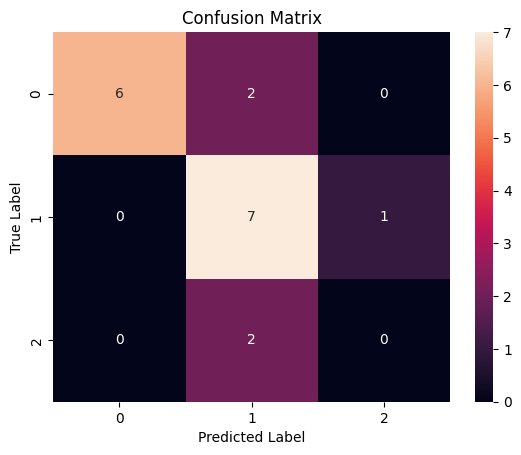

In [161]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the highest probability class
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 16ms/step


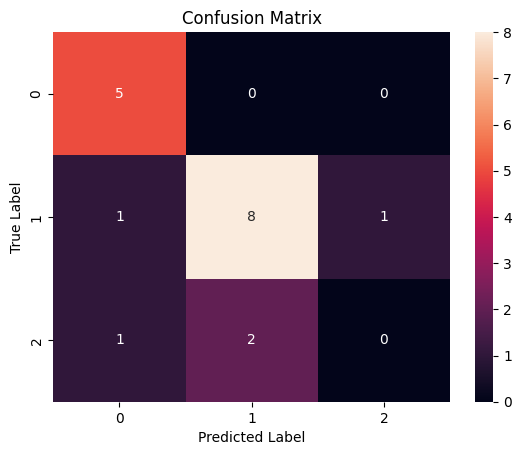

In [162]:
y_pred = model.predict(X_val)
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the highest probability class
cm = confusion_matrix(y_val, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [232]:
import pandas as pd
import numpy as np

# Parameters
SAMPLE_RATE = 1000  # Hz
WINDOW_SIZE = SAMPLE_RATE * 2  # 2 seconds
STEP_SIZE = SAMPLE_RATE  # 1-second overlap

def segment_geophone_data(file_path, label, window_size=WINDOW_SIZE, step_size=STEP_SIZE):
    """
    Segments geophone data into overlapping windows while preserving order.

    Args:
    - file_path (str): Path to CSV file.
    - label (int): Class label for the movement type.
    - window_size (int): Number of samples per window.
    - step_size (int): Step size for sliding window.

    Returns:
    - segmented_data (list): List of segmented data as numpy arrays.
    - labels (list): Corresponding labels.
    """
    # Load data
    df = pd.read_csv(file_path)

    segmented_data = []
    labels = []
    new_df = pd.DataFrame()

    # Ensure consistent segmentation across columns (each column is a geophone)
    for start in range(0, len(df), step_size):
        end = start + window_size
        if end <= len(df):
            segment = df.iloc[start:end].values # Extract window
            new_data = segment.T
            new_df = pd.concat([new_df, pd.DataFrame(new_data)], axis=0, ignore_index=True)  # Concatenate new data
    new_df['label'] = label  # Add label to the DataFrame
    return new_df

# Example usage with two CSV files
file_paths = {
    r"C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\Gevriela\Code\nothing_old.csv": 0,  # Label 0 for movement typ 1
    r"C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\Gevriela\Code\man_old.csv": 1,   # Label 1 for movement type 2
    r"C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\Gevriela\Code\car_old.csv": 2   # Label 1 for movement type 2
}

final_data = []
final_labels = []
segmented_df = pd.DataFrame()
for file, label in file_paths.items():
    new_df = segment_geophone_data(file, label)
    segmented_df = pd.concat([segmented_df, new_df], axis=0)



# Save processed data
segmented_df.to_csv("segmented_geophone_data.csv", index=False)

(2000, 39) (39, 2000)
(2000, 39) (78, 2000)
(2000, 39) (117, 2000)
(2000, 39) (156, 2000)
(2000, 39) (195, 2000)
(2000, 39) (234, 2000)
(2000, 39) (273, 2000)
(2000, 39) (312, 2000)
(2000, 39) (351, 2000)
(2000, 39) (390, 2000)
(2000, 39) (429, 2000)
(2000, 39) (468, 2000)
(2000, 39) (507, 2000)
(2000, 39) (546, 2000)
(2000, 39) (585, 2000)
(2000, 39) (624, 2000)
(2000, 39) (663, 2000)
(2000, 39) (702, 2000)
(2000, 39) (741, 2000)
(2000, 39) (780, 2000)
(2000, 39) (819, 2000)
(2000, 39) (858, 2000)
(2000, 39) (897, 2000)
(2000, 39) (936, 2000)
(2000, 37) (37, 2000)
(2000, 37) (74, 2000)
(2000, 37) (111, 2000)
(2000, 37) (148, 2000)
(2000, 37) (185, 2000)
(2000, 37) (222, 2000)
(2000, 37) (259, 2000)
(2000, 37) (296, 2000)
(2000, 37) (333, 2000)
(2000, 37) (370, 2000)
(2000, 37) (407, 2000)
(2000, 37) (444, 2000)
(2000, 37) (481, 2000)
(2000, 37) (518, 2000)
(2000, 37) (555, 2000)
(2000, 37) (592, 2000)
(2000, 37) (629, 2000)
(2000, 37) (666, 2000)
(2000, 37) (703, 2000)
(2000, 37) (740

In [257]:
import numpy as np

time_steps = 2000  # Define how many past readings to use per sample
X =  segmented_df.loc[:, segmented_df.columns != "label"].values
y = segmented_df["label"].values

In [258]:
X, y, X.shape, y.shape

(array([[-4.2617e-02, -5.5432e-02, -5.8711e-02, ...,  1.7285e-02,
          2.9802e-04, -1.4901e-02],
        [-8.3447e-03, -5.3644e-03, -5.3644e-03, ..., -8.3447e-03,
         -7.1526e-03, -7.7486e-03],
        [ 7.4506e-03,  8.0466e-03,  6.8545e-03, ...,  5.9605e-04,
          8.9407e-04,  2.3842e-03],
        ...,
        [ 2.9802e-02,  2.7239e-01,  5.1171e-01, ...,  2.6703e-01,
          2.4587e-01,  2.1100e-01],
        [ 7.1228e-02,  2.1905e-01,  3.5405e-01, ...,  2.2352e-02,
          2.8312e-02,  2.7120e-02],
        [-5.6326e-02, -5.4538e-02, -4.4107e-02, ..., -5.7518e-02,
         -6.3479e-02, -7.0333e-02]]),
 array([0, 0, 0, ..., 2, 2, 2], dtype=int64),
 (2337, 2000),
 (2337,))

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [260]:
import tensorflow as tf
from tensorflow.keras import layers, models
time_steps = 2000
# Define a compact model
model = models.Sequential([
    layers.Input(shape=(time_steps)),  # Single feature input
    layers.Dense(16, activation="relu"),  # First dense layer
    layers.Dense(8, activation="relu"),   # Second dense layer
    layers.Dense(3, activation="softmax") # Output layer for 3 classes
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Show summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 16)                32016     
                                                                 
 dense_82 (Dense)            (None, 8)                 136       
                                                                 
 dense_83 (Dense)            (None, 3)                 27        
                                                                 
Total params: 32,179
Trainable params: 32,179
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/20
44/44 [==============================] - 0s 4ms/step - loss: 1.0437 - accuracy: 0.5093 - val_loss: 1.0052 - val_accuracy: 0.5375
Epoch 2/20
44/44 [==============================] - 0s 2ms/step - loss: 0.9225 - accuracy: 0.6027 - val_loss: 0.9235 - val_accuracy: 0.5546
Epoch 3/20
44/44 [==============================] - 0s 2ms/step - loss: 0.8271 - accuracy: 0.6098 - val_loss: 0.8410 - val_accuracy: 0.5503
Epoch 4/20
44/44 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.6098 - val_loss: 0.7720 - val_accuracy: 0.5460
Epoch 5/20
44/44 [==============================] - 0s 2ms/step - loss: 0.6471 - accuracy: 0.6098 - val_loss: 0.7156 - val_accuracy: 0.5460
Epoch 6/20
44/44 [==============================] - 0s 2ms/step - loss: 0.5848 - accuracy: 0.6113 - val_loss: 0.6856 - val_accuracy: 0.5482
Epoch 7/20
44/44 [==============================] - 0s 2ms/step - loss: 0.5351 - accuracy: 0.6412 - val_loss: 0.6714 - val_accuracy: 0.7345
Epoch 8/20
44/44 [==

15/15 [==============================] - 0s 1000us/step - loss: 0.6865 - accuracy: 0.8205
Test Loss: 0.6865
Test Accuracy: 0.8205
15/15 [==============================] - 0s 857us/step


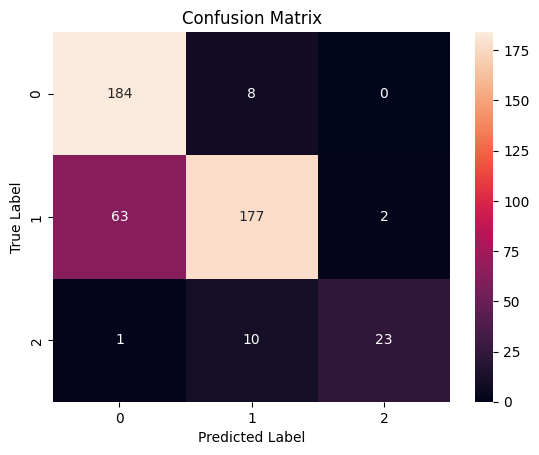

In [262]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Get the highest probability class
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [264]:
time_steps = 2000
# input
inp = tf.keras.Input(shape=(time_steps))

# convolutional layers
lay0 = tf.keras.layers.Dense(
    units=16,
    activation=tf.nn.relu,
)(inp)

lay1 = tf.keras.layers.Dense(
    units=8,
    activation=tf.nn.relu,
)(lay0)

# fully connected layer
dense = tf.keras.layers.Dense(units=10)(lay1)

model = tf.keras.Model(inputs=inp, outputs=dense)
model.summary()


Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 2000)]            0         
                                                                 
 dense_85 (Dense)            (None, 16)                32016     
                                                                 
 dense_86 (Dense)            (None, 8)                 136       
                                                                 
 dense_87 (Dense)            (None, 10)                90        
                                                                 
Total params: 32,242
Trainable params: 32,242
Non-trainable params: 0
_________________________________________________________________


In [275]:
import nengo
import nengo_dl
import tensorflow as tf
from tensorflow.keras import layers, models

time_steps = 2000

# Define the ANN model
model = models.Sequential([
    layers.Input(shape=(time_steps,)),  # Single feature input
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(3, activation="softmax")
])

# Convert the model to NengoDL format
with nengo.Network() as net:
    converter = nengo_dl.Converter(model)
    nengo_model = converter.net  # Use this functional model # The converted Nengo model
# Display the network structure
print(nengo_model)

<Network "model_31">


C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\converter.py:920: UserWarning: Converting sequential model to functional model; use `Converter.model` to refer to the functional model (rather than the original sequential model) when working with the output of the Converter
  warnings.warn(
C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\converter.py:583: UserWarning: Activation type <function softmax at 0x0000012FA6315CA0> does not have a native Nengo equivalent; falling back to a TensorNode
  warnings.warn(


In [276]:
sim = nengo_dl.Simulator(nengo_model)
sim.run_steps(10)  # Run 10 time steps

Build finished in 0:00:00                                                      
Optimization finished in 0:00:00                                               
|             Constructing graph: build stage (0%)             | ETA:  --:--:--

C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\simulator.py:456: UserWarning: No GPU support detected. See https://www.nengo.ai/nengo-dl/installation.html#installing-tensorflow for instructions on setting up TensorFlow with GPU support.
  warnings.warn(


Construction finished in 0:00:00                                               
Simulation finished in 0:00:00                                                 


In [273]:
converter = nengo_dl.Converter(model)

do_training = True
if do_training:
    with nengo_dl.Simulator(converter.net, minibatch_size=200) as sim:
        # run training
        sim.compile(
            optimizer=tf.optimizers.Adam(0.001),
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[tf.metrics.sparse_categorical_accuracy],
        )
        sim.fit(
            {converter.inputs[inp]: X_train},
            {converter.outputs[out]: y_train},
            validation_data=(
                {converter.inputs[inp]: X_val},
                {converter.outputs[out]: y_val},
            ),
            epochs=2,
        )

        # save the parameters to file
        sim.save_params("./geo_params.npz")
else:

    print("Load pretrained weights")

C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\converter.py:920: UserWarning: Converting sequential model to functional model; use `Converter.model` to refer to the functional model (rather than the original sequential model) when working with the output of the Converter
  warnings.warn(
C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\converter.py:583: UserWarning: Activation type <function softmax at 0x0000012FA6315CA0> does not have a native Nengo equivalent; falling back to a TensorNode
  warnings.warn(


AttributeError: 'Functional' object has no attribute 'seed'

In [203]:
# input
inp = tf.keras.Input(shape=(169000, 1))

# convolutional layers
lay0 = tf.keras.layers.Dense(units=16)(inp)

lay1 = tf.keras.layers.Dense(units=8)(lay0)

dense = tf.keras.layers.Dense(3, activation="softmax")(lay1)

model1 = tf.keras.Model(inputs=inp, outputs=dense)
model1.summary()

Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 169000, 1)]       0         
                                                                 
 dense_71 (Dense)            (None, 169000, 16)        32        
                                                                 
 dense_72 (Dense)            (None, 169000, 8)         136       
                                                                 
 dense_73 (Dense)            (None, 169000, 3)         27        
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [204]:
converter = nengo_dl.Converter(model1)

do_training = True
if do_training:
    with nengo_dl.Simulator(converter.net, minibatch_size=200) as sim:
        # run training
        sim.compile(
            optimizer=tf.optimizers.Adam(0.001),
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[tf.metrics.sparse_categorical_accuracy],
        )
        sim.fit(
            {converter.inputs[inp]: X_train},
            {converter.outputs[out]: y_train},
            validation_data=(
                {converter.inputs[inp]: X_val},
                {converter.outputs[out]: y_val},
            ),
            epochs=2,
        )

        # save the parameters to file
        sim.save_params("./geo_params.npz")
else:

    print("Load pretrained weights")

ValidationError: init: Shape of initial value (16, 1) does not match expected shape (2704000, 1)

In [171]:
def run_network(
    activation,
    params_file="keras_to_snn_params",
    n_steps=30,
    scale_firing_rates=1,
    synapse=None,
    n_test=400,
):
    # convert the keras model to a nengo network
    nengo_converter = nengo_dl.Converter(
        model,
        swap_activations={tf.nn.relu: activation},
        scale_firing_rates=scale_firing_rates,
        synapse=synapse,
    )

    # get input/output objects
    nengo_input = nengo_converter.inputs[inp]
    nengo_output = nengo_converter.outputs[dense]

    # add a probe to the first convolutional layer to record activity.
    # we'll only record from a subset of neurons, to save memory.
    sample_neurons = np.linspace(
        0,
        np.prod(conv0.shape[1:]),
        1000,
        endpoint=False,
        dtype=np.int32,
    )
    with nengo_converter.net:
        conv0_probe = nengo.Probe(nengo_converter.layers[conv0][sample_neurons])

    # repeat inputs for some number of timesteps
    tiled_test_images = np.tile(test_images[:n_test], (1, n_steps, 1))

    # set some options to speed up simulation
    with nengo_converter.net:
        nengo_dl.configure_settings(stateful=False)

    # build network, load in trained weights, run inference on test images
    with nengo_dl.Simulator(
        nengo_converter.net, minibatch_size=10, progress_bar=False
    ) as nengo_sim:
        nengo_sim.load_params(params_file)
        data = nengo_sim.predict({nengo_input: tiled_test_images})

    # compute accuracy on test data, using output of network on
    # last timestep
    predictions = np.argmax(data[nengo_output][:, -1], axis=-1)
    accuracy = (predictions == test_labels[:n_test, 0, 0]).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    # plot the results
    for ii in range(3):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title("Input image")
        plt.imshow(test_images[ii, 0].reshape((28, 28)), cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        scaled_data = data[conv0_probe][ii] * scale_firing_rates
        if isinstance(activation, nengo.SpikingRectifiedLinear):
            scaled_data *= 0.001
            rates = np.sum(scaled_data, axis=0) / (n_steps * nengo_sim.dt)
            plt.ylabel("Number of spikes")
        else:
            rates = scaled_data
            plt.ylabel("Firing rates (Hz)")
        plt.xlabel("Timestep")
        plt.title(
            f"Neural activities (conv0 mean={rates.mean():.1f} Hz, "
            f"max={rates.max():.1f} Hz)"
        )
        plt.plot(scaled_data)

        plt.subplot(1, 3, 3)
        pred =  np.argmax(data[nengo_output][ii, -1], axis=-1)
        plt.title(f"Output predictions _{pred}")
        plt.plot(tf.nn.softmax(data[nengo_output][ii]))
        plt.legend([str(j) for j in range(10)], loc="upper left")
        plt.xlabel("Timestep")
        plt.ylabel("Probability")

        plt.tight_layout()

In [172]:
run_network(activation=nengo.SpikingRectifiedLinear())


C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\converter.py:140: UserWarning: swap_activations contained {<function relu at 0x0000012FA00D4A60>}, but there were no layers in the model with that activation type
  warnings.warn(


KeyError: (<Reference wrapping <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>>,)

In [3]:

import nengo
import nengo_dl
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

C:\Users\User\PycharmProjects\PythonProject\Nengo_learn\.venv\lib\site-packages\nengo_dl\version.py:58: UserWarning: This version of NengoDL has not been tested with your Nengo version (4.0.0). The latest fully supported version is 3.2.0.
  warnings.warn(warnstr)


NameError: name 'np' is not defined

In [11]:
(train_images, train_labels), (
    test_images,
    test_labels,
) = tf.keras.datasets.mnist.load_data()

# flatten images and add time dimension
train_images = train_images.reshape((train_images.shape[0], 1, -1))
train_labels = train_labels.reshape((train_labels.shape[0], 1, -1))
test_images = test_images.reshape((test_images.shape[0], 1, -1))
test_labels = test_labels.reshape((test_labels.shape[0], 1, -1))

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(np.reshape(train_images[i], (28, 28)), cmap="gray")
    plt.axis("off")
    plt.title(str(train_labels[i, 0, 0]))

NameError: name 'plt' is not defined

In [6]:
# input
inp = tf.keras.Input(shape=(28, 28, 1))

# convolutional layers
conv0 = tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    activation=tf.nn.relu,
)(inp)

conv1 = tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=2,
    activation=tf.nn.relu,
)(conv0)

# fully connected layer
flatten = tf.keras.layers.Flatten()(conv1)
dense = tf.keras.layers.Dense(units=10)(flatten)

model = tf.keras.Model(inputs=inp, outputs=dense)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                                 
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_________________________________________________________________


In [208]:
do_training = False
if do_training:
    with nengo_dl.Simulator(converter.net, minibatch_size=200) as sim:
        # run training
        sim.compile(
            optimizer=tf.optimizers.Adam(0.001),
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[tf.metrics.sparse_categorical_accuracy],
        )
        sim.fit(
            {converter.inputs[inp]: train_images},
            {converter.outputs[dense]: train_labels},
            validation_data=(
                {converter.inputs[inp]: test_images},
                {converter.outputs[dense]: test_labels},
            ),
            epochs=2,
        )

        # save the parameters to file
        sim.save_params("./keras_to_snn_params")
else:
    # download pretrained weights
    urlretrieve(
        "https://drive.google.com/uc?export=download&"
        "id=1lBkR968AQo__t8sMMeDYGTQpBJZIs2_T",
        "model/keras_to_snn_params.npz",
    )
    print("Loaded pretrained weights")

Loaded pretrained weights


In [14]:
def run_network(
    activation,
    params_file="./model/keras_to_snn_params",
    n_steps=30,
    scale_firing_rates=1,
    synapse=None,
    n_test=400,
):
    # convert the keras model to a nengo network
    nengo_converter = nengo_dl.Converter(
        model,
        swap_activations={tf.nn.relu: activation},
        scale_firing_rates=scale_firing_rates,
        synapse=synapse,
    )
    print(inp)
    print("out", dense)
    # get input/output objects
    nengo_input = nengo_converter.inputs[inp]
    nengo_output = nengo_converter.outputs[dense]

    # add a probe to the first convolutional layer to record activity.
    # we'll only record from a subset of neurons, to save memory.
    sample_neurons = np.linspace(
        0,
        np.prod(conv0.shape[1:]),
        1000,
        endpoint=False,
        dtype=np.int32,
    )
    with nengo_converter.net:
        conv0_probe = nengo.Probe(nengo_converter.layers[conv0][sample_neurons])

    # repeat inputs for some number of timesteps
    tiled_test_images = np.tile(test_images[:n_test], (1, n_steps, 1))

    # set some options to speed up simulation
    with nengo_converter.net:
        nengo_dl.configure_settings(stateful=False)

    # build network, load in trained weights, run inference on test images
    with nengo_dl.Simulator(
        nengo_converter.net, minibatch_size=10, progress_bar=False
    ) as nengo_sim:
        nengo_sim.load_params(params_file)
        data = nengo_sim.predict({nengo_input: tiled_test_images})

    # compute accuracy on test data, using output of network on
    # last timestep
    predictions = np.argmax(data[nengo_output][:, -1], axis=-1)
    accuracy = (predictions == test_labels[:n_test, 0, 0]).mean()
    print(f"Test accuracy: {100 * accuracy:.2f}%")

    # plot the results
    for ii in range(3):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 3, 1)
        plt.title("Input image")
        plt.imshow(test_images[ii, 0].reshape((28, 28)), cmap="gray")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        scaled_data = data[conv0_probe][ii] * scale_firing_rates
        if isinstance(activation, nengo.SpikingRectifiedLinear):
            scaled_data *= 0.001
            rates = np.sum(scaled_data, axis=0) / (n_steps * nengo_sim.dt)
            plt.ylabel("Number of spikes")
        else:
            rates = scaled_data
            plt.ylabel("Firing rates (Hz)")
        plt.xlabel("Timestep")
        plt.title(
            f"Neural activities (conv0 mean={rates.mean():.1f} Hz, "
            f"max={rates.max():.1f} Hz)"
        )
        plt.plot(scaled_data)

        plt.subplot(1, 3, 3)
        pred =  np.argmax(data[nengo_output][ii, -1], axis=-1)
        plt.title(f"Output predictions _{pred}")
        plt.plot(tf.nn.softmax(data[nengo_output][ii]))
        plt.legend([str(j) for j in range(10)], loc="upper left")
        plt.xlabel("Timestep")
        plt.ylabel("Probability")

        plt.tight_layout()

In [15]:
run_network(activation=nengo.RectifiedLinear(), n_steps=10)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
out KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")
30/40 [=====================>........] - ETA: 2s

KeyboardInterrupt: 

In [7]:
run_network(activation=nengo.SpikingRectifiedLinear())

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
out KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense/BiasAdd:0', description="created by layer 'dense'")


NameError: name 'np' is not defined

Synapse=0.001
40/40 [==============================] - 45s 1s/step
Test accuracy: 26.50%


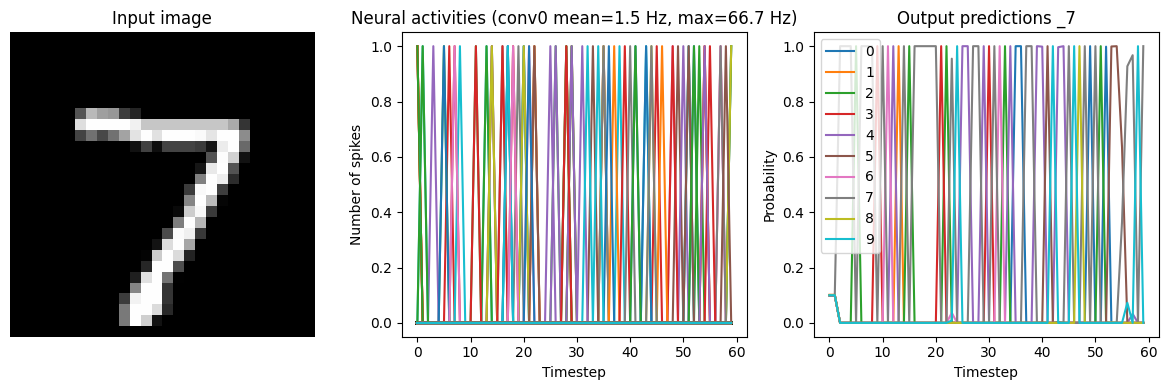

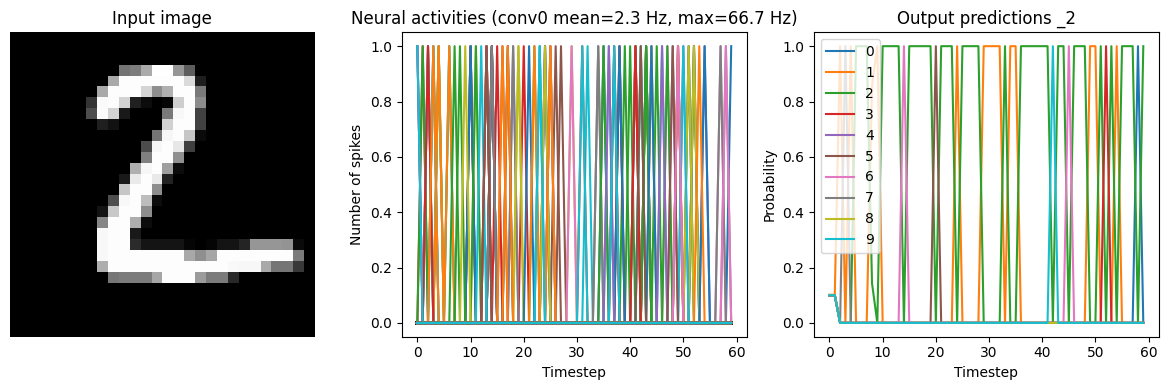

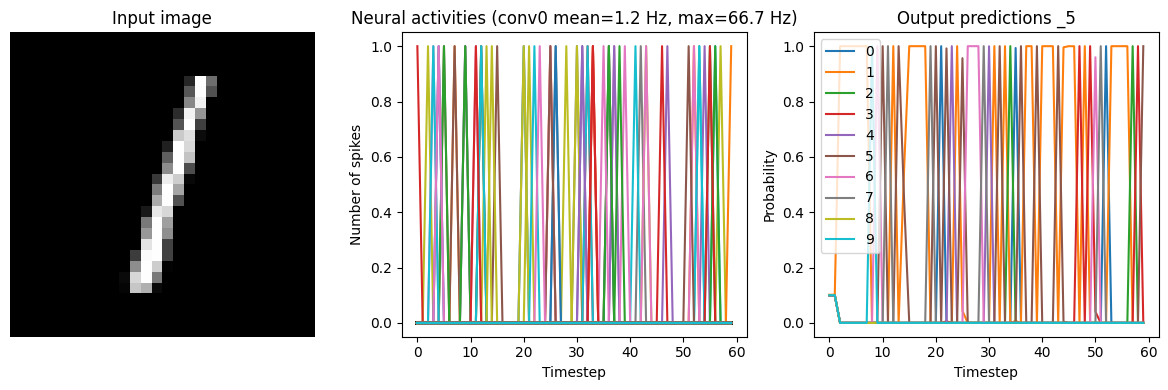

Synapse=0.005
40/40 [==============================] - 45s 1s/step
Test accuracy: 53.25%


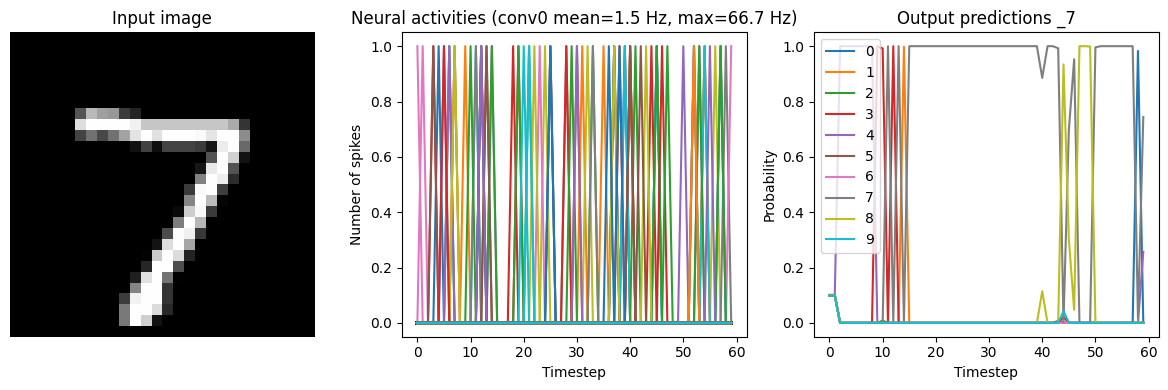

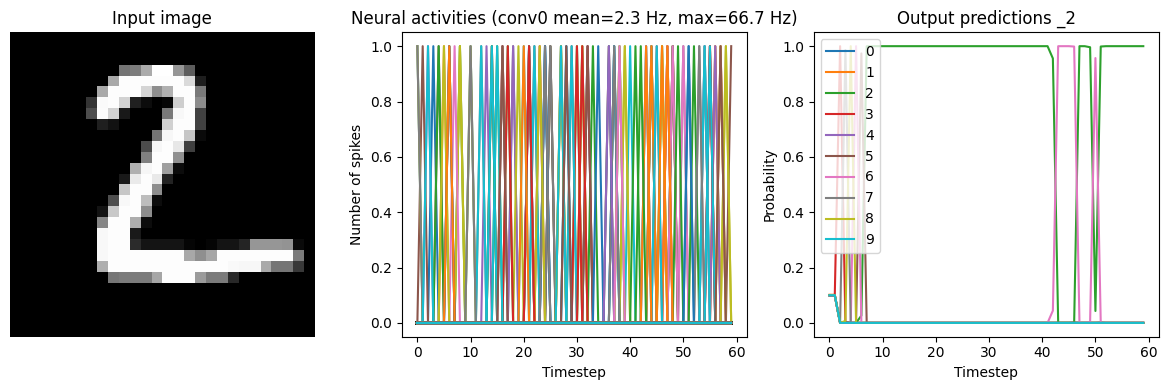

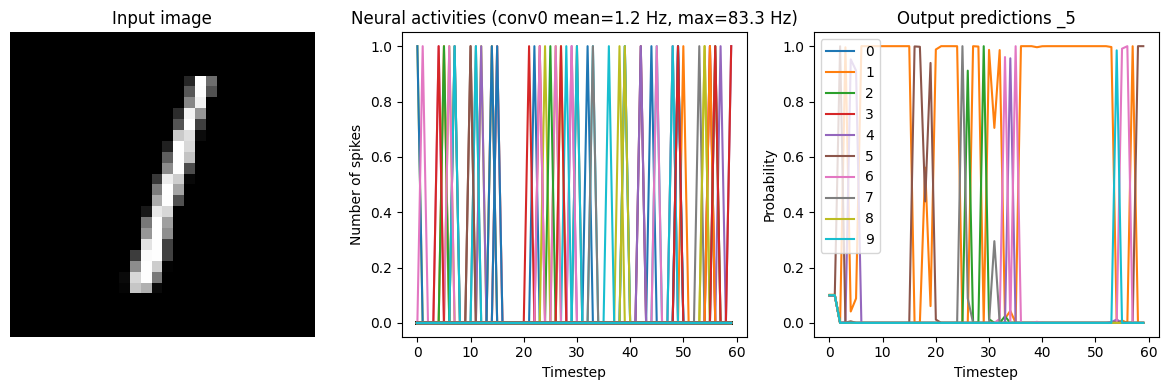

Synapse=0.010
40/40 [==============================] - 44s 1s/step
Test accuracy: 72.25%


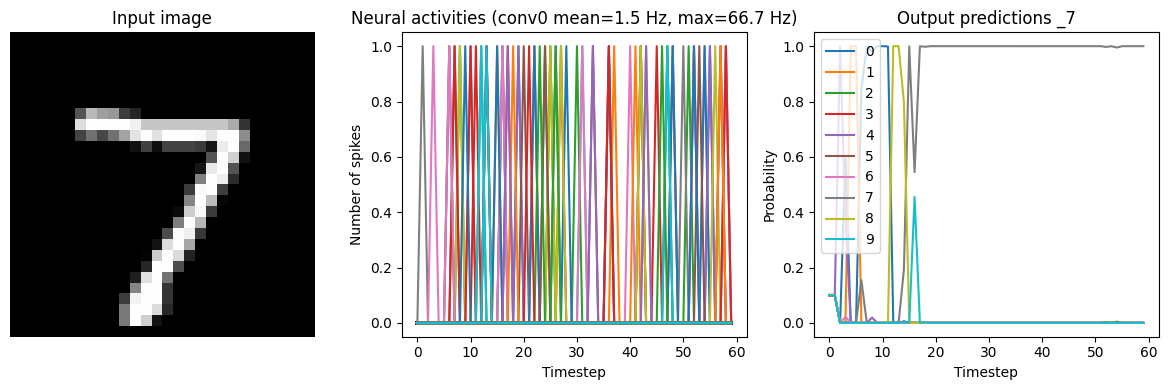

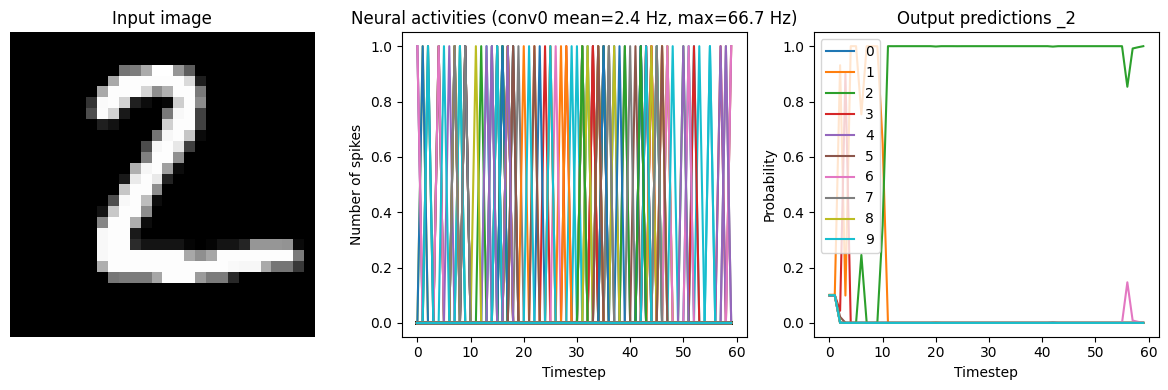

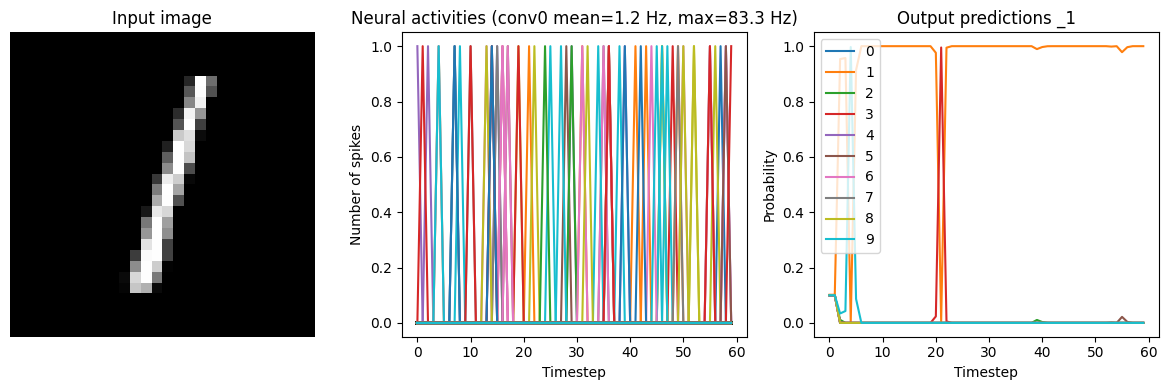

In [16]:
for s in [0.001, 0.005, 0.01]:
    print(f"Synapse={s:.3f}")
    run_network(
        activation=nengo.SpikingRectifiedLinear(),
        n_steps=60,
        synapse=s,
    )
    plt.show()